![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [2]:
import numpy as np
data = np.load('/content/drive/MyDrive/Colab Notebooks/ACV/images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [3]:
data[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

In [4]:
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


In [5]:
data.shape

(409, 2)

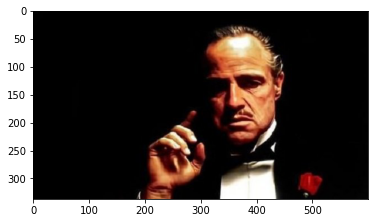

In [6]:
from matplotlib import pyplot as plt

plt.imshow(data[10][0], cmap='gray')
plt.show()

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [7]:
import numpy as np
import csv

IMAGE_HEIGHT=224
IMAGE_WIDTH=224
IMAGE_SIZE=28

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [8]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

Training data

In [9]:
X.shape

(409, 224, 224, 3)

In [10]:
X_train = X[:400]
y_train = masks[:400] #### Add your code here ####

Testing data

In [11]:
X_test = X[400:]
y_test = masks[400:]#### Add your code here ####

In [12]:
y_train.shape

(400, 224, 224)

### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

In [13]:
X_train[150]

array([[[ 0.49019611,  0.4666667 ,  0.6156863 ],
        [ 0.48235297,  0.45882356,  0.60784316],
        [ 0.41176474,  0.39607847,  0.5529412 ],
        ...,
        [ 0.36470592,  0.35686278,  0.34117651],
        [ 0.26274514,  0.25490201,  0.23921573],
        [-0.2235294 , -0.23137254, -0.24705881]],

       [[ 0.42745101,  0.41960788,  0.5529412 ],
        [ 0.4666667 ,  0.45098042,  0.60000002],
        [ 0.48235297,  0.4666667 ,  0.63137257],
        ...,
        [ 0.48235297,  0.47450984,  0.45098042],
        [ 0.28627455,  0.28627455,  0.26274514],
        [-0.12941176, -0.13725489, -0.1607843 ]],

       [[ 0.4039216 ,  0.41960788,  0.54509807],
        [ 0.4666667 ,  0.47450984,  0.6156863 ],
        [ 0.47450984,  0.48235297,  0.63921571],
        ...,
        [ 0.39607847,  0.38039219,  0.38823533],
        [ 0.35686278,  0.34901965,  0.34901965],
        [-0.06666666, -0.08235294, -0.0745098 ]],

       ...,

       [[ 0.27843142,  0.29411769,  0.45882356],
        [ 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


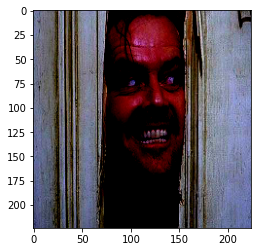

In [14]:
from matplotlib import pyplot as plt

plt.imshow(X_train[150])
plt.show()

Print the mask

In [15]:
y_train[150]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

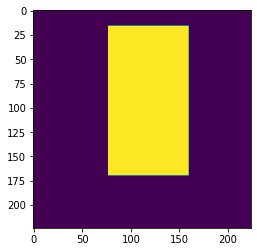

In [16]:
from matplotlib import pyplot as plt

plt.imshow(y_train[150])
plt.show()

## Create the model (14 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [17]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

In [18]:
ALPHA = 1.0

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])

    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (4 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [19]:
model = create_model(False)

17235968/17225924 [==============================] - 1s 0us/step


### Print model summary (2 mark)

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

### Define dice coefficient function (4 marks)
- Create a function to calculate dice coefficient


In [21]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss function (4 marks)

In [22]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (4 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [23]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Define callbacks (4 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

EPOCHS = 10
BATCH_SIZE = 1
PATIENCE = 10

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="val_loss", patience=PATIENCE, mode="auto")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [25]:
import tensorflow as tf

In [26]:
X_train.shape

(400, 224, 224, 3)

In [27]:
X_test.shape

(9, 224, 224, 3)

In [28]:
y_train.shape

(400, 224, 224)

In [30]:
# Fit the model
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose='auto', callbacks=[checkpoint, reduce_lr, stop], validation_data=(X_test,y_test))
#model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, callbacks=[checkpoint, reduce_lr, stop])

Streaming output truncated to the last 5000 lines.
Epoch 00004: loss did not improve from 0.41543
308/400 [======================>.......] - ETA: 5s - loss: 0.9323 - dice_coefficient: 0.5288
Epoch 00004: loss did not improve from 0.41543
309/400 [======================>.......] - ETA: 5s - loss: 0.9307 - dice_coefficient: 0.5296
Epoch 00004: loss did not improve from 0.41543
310/400 [======================>.......] - ETA: 5s - loss: 0.9291 - dice_coefficient: 0.5301
Epoch 00004: loss did not improve from 0.41543
311/400 [======================>.......] - ETA: 5s - loss: 0.9282 - dice_coefficient: 0.5307
Epoch 00004: loss did not improve from 0.41543
312/400 [======================>.......] - ETA: 4s - loss: 0.9291 - dice_coefficient: 0.5299
Epoch 00004: loss did not improve from 0.41543
313/400 [======================>.......] - ETA: 4s - loss: 0.9306 - dice_coefficient: 0.5291
Epoch 00004: loss did not improve from 0.41543
314/400 [======================>.......] - ETA: 4s - loss: 0.9

### Get the predicted mask for a test image   (5 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


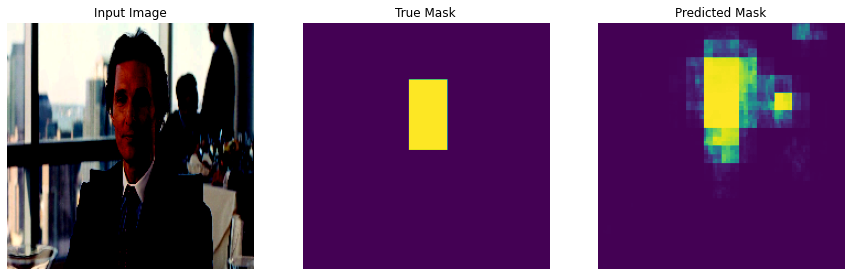

In [31]:
n = 3
sample_image = X_test[n]
sample_mask  = y_test[n]

def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

prediction = model.predict(np.expand_dims(sample_image, axis=0))

display([sample_image, sample_mask, prediction[0]])

Show original mask for test image

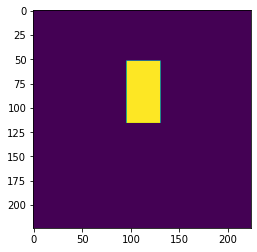

In [32]:
from matplotlib import pyplot as plt

plt.imshow(y_test[3])
plt.show()

Predict the mask on the test image

In [41]:
from google.colab.patches import cv2_imshow

In [46]:
unscaled=X_test[3]
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]


### Impose the mask on the test image (5 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


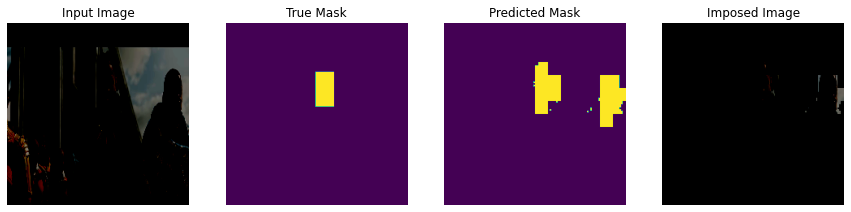

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


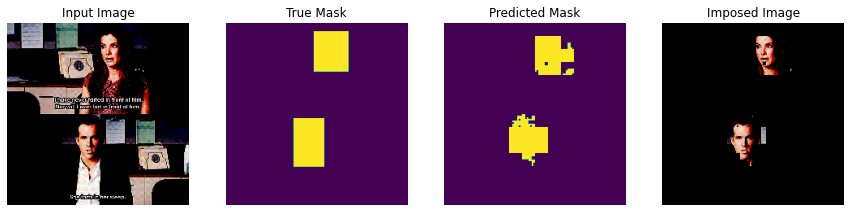

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


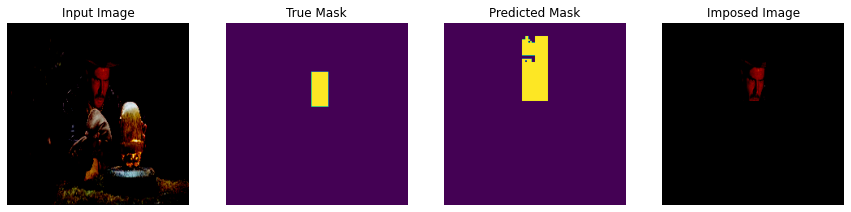

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


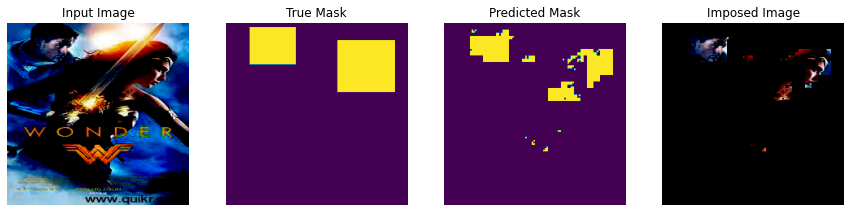

In [47]:
def display_images(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask', 'Imposed Image']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

for i in [3,5,7,9]:
    n = i
    sample_image = X_train[n]

    display_list = [sample_image, masks[n]]

    unscaled = sample_image
    image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))

    pred_mask = cv2.resize(1.0*(model.predict(x=np.array([image]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))
    display_list.append(pred_mask)


    image2 = image
    image2[:,:,0] = pred_mask*image[:,:,0]
    image2[:,:,1] = pred_mask*image[:,:,1]
    image2[:,:,2] = pred_mask*image[:,:,2]

    out_image = image2
    display_list.append(out_image)
    display_images(display_list)
